- EEG
 - EndToEnd
    - LEVEL
    - KSS
  - Fature
    - LEVEL
    - KSS
- Face
  - EndToEND
    - LEVEL
    - KSS
  - Fature
    - LEVEL
    - KSS
- ECG
  - EndToEnd
    - LEVEL
    - KSS
  - Fature
    - LEVEL
    - KSS
[image.png](attachment:image.png)

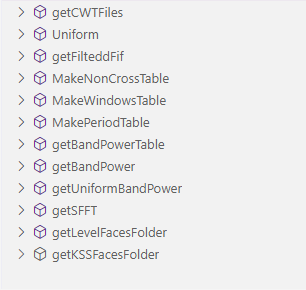

In [1]:
def setProjectPath(projectPath):
    import os
    import sys
    root=os.path.abspath(projectPath)
    print(root)
    sys.path.append(root)
    os.environ["TORCH_HOME"]=r"E:\Data\torch-model"
    import warnings  
    warnings.filterwarnings("ignore", category=RuntimeWarning, module="mne")

projectPath=r'D:\project_meta\NNproject\NNI'
setProjectPath(projectPath)

D:\project_meta\NNproject\NNI


# ControlTbale

In [2]:
from project.dataprocess.DatasetProcess import MakeWindowsTable
from project.dataprocess.FolderTree import *
datasetFolder=r'D:\dataset\driver_dataset\DROZY\DROZY'
datasetDict=getDataPath(datasetFolder)

outputFolder=r'D:\project_meta\NNproject\NNI\output'
outputDict=getOutPath(outputFolder)

from pprint import pprint
print('datasetDict:')
pprint(datasetDict)
print('outputDict:')
pprint(outputDict)

datasetDict:
{'annotation_auto_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\annotations-auto',
 'annotation_manual_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\annotations-manual',
 'kinect_file': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\kinect-intrinsics.yaml',
 'kss_file': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\KSS.txt',
 'psg_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\psg',
 'pvt_rt_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\pvt-rt',
 'videos_folder': 'D:\\dataset\\driver_dataset\\DROZY\\DROZY\\videos_i8'}
outputDict:
{'ECG_filted_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\psg_filted\\ECG',
 'ECG_table_file': 'D:\\project_meta\\NNproject\\NNI\\output\\ECG_table.csv',
 'ECG_uniformfilted_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\psg_filted\\ECG',
 'EEG_filted_folder': 'D:\\project_meta\\NNproject\\NNI\\output\\psg_filted\\EEG',
 'EEG_table_file': 'D:\\project_meta\\NNproject\\NNI\\output\\EEG_table.csv',
 'EEG_uniformfilt

In [3]:
from project.dataprocess.DatasetProcess import *
toRefreshWindowsTbale=False
def refreshWindowsTbale(toRefreshWindowsTbale):
    if refreshWindowsTbale==True and os.path.exists(outputDict['windowsTable']):
        os.remove(os.path.exists(outputDict['windowsTable']))
        windowsTable=MakeWindowsTable(psg_folder=datasetDict['psg_folder'],kss_file_path=datasetDict['kss_file'])
        windowsTable.to_csv(outputDict['windowsTable'])
    if not os.path.exists(outputDict['windowsTable']):
        windowsTable=MakeWindowsTable(psg_folder=datasetDict['psg_folder'],kss_file_path=datasetDict['kss_file'])
        windowsTable.to_csv(outputDict['windowsTable'])
        
refreshWindowsTbale(toRefreshWindowsTbale)

# EEG

## EndToEnd


### SignalWave

In [4]:
from project.dataset.BaseDataset import *
import pandas as pd
controlWindows=pd.read_csv(r"D:\project_meta\NNproject\NNI\output\windowsTable.csv")
signalwavedataset=TableControlEEGDataset(controlWindows,psgFileFolderPath=datasetDict['psg_folder'],Mintime=15)

In [5]:
signalwavedataset[0]['data']

array([[-9.27762688e-06,  1.08401746e-05,  1.94341868e-05, ...,
         1.66020692e-05,  1.58207953e-05,  1.87505722e-05],
       [-1.26956999e-06,  1.66997284e-05,  2.60750145e-05, ...,
         1.86529130e-05,  1.80669576e-05,  2.10943937e-05],
       [-1.97271645e-05,  3.90636921e-07,  8.78933073e-06, ...,
         1.34769738e-05,  1.63090915e-05,  1.98248238e-05],
       [-2.38288522e-05, -7.22678304e-06, -9.76592303e-07, ...,
         1.26956999e-06,  9.76592303e-07,  6.25019074e-06],
       [-2.92001099e-05, -1.52348399e-05, -7.32444227e-06, ...,
        -2.14850307e-06,  1.95318461e-06,  7.03146458e-06]])

In [6]:
from project.dataset.ExtendDataset import *
import pandas as pd
controlWindows=pd.read_csv(r"D:\project_meta\NNproject\NNI\output\windowsTable.csv")
dataset=SFFTDataset(controlWindows,psgFileFolderPath=datasetDict['psg_folder'],Mintime=15)

## Feature

### CWT

### SFFT

- BandPower

In [7]:
from project.dataprocess.DatasetProcess import getBandPower,getUniformBandPower,MakePeriodTable,MakeNonCrossTable,getBandPowerTable,getUniformBandPowerTable
from project.dataprocess.FolderTree import getDataPath,getOutPath
bandPowerTable=getBandPowerTable(datasetDict['kss_file'],datasetDict['psg_folder'],N_FFT=15*512,HOP_LEN=15*512)
uniformBandaPower=getUniformBandPowerTable(bandPowerTable)


Extracting EDF parameters from D:\dataset\driver_dataset\DROZY\DROZY\psg\1-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from D:\dataset\driver_dataset\DROZY\DROZY\psg\1-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from D:\dataset\driver_dataset\DROZY\DROZY\psg\1-3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


D:\project_meta\NNproject\NNI\project\dataprocess\SignalProcess.py:199: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  startIndex=torch.range(0,((len(y)-N_FFT)//HOP_LENGTH))*HOP_LENGTH


Extracting EDF parameters from D:\dataset\driver_dataset\DROZY\DROZY\psg\10-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from D:\dataset\driver_dataset\DROZY\DROZY\psg\10-3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from D:\dataset\driver_dataset\DROZY\DROZY\psg\11-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from D:\dataset\driver_dataset\DROZY\DROZY\psg\11-2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from D:\dataset\driver_dataset\DROZY\DROZY\psg\11-3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from D:\dataset\driver_dataset\DROZY\DROZY\psg\12-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info struc

In [162]:
# channel_per=rawPowerTable.filter(like='Fz').sum(axis=1)/sumpower
# channel_per.name='ss'
# pd.concat([table[0],channel_per],axis=1)


,Fz_delta,Fz_theta,Fz_alpha,Fz_beta,Fz_gamma,ss
0,0.579057,0.154828,0.059959,0.086588,0.119569,0.310105
1,0.466891,0.212342,0.118461,0.126763,0.075543,0.304782
2,0.531224,0.169232,0.092406,0.130054,0.077084,0.306296
3,0.572020,0.209537,0.108421,0.074054,0.035967,0.351754
4,0.637364,0.142529,0.074794,0.073233,0.072080,0.369166
...,...,...,...,...,...,...
1435,0.784645,0.096427,0.023482,0.065621,0.029825,0.391801
1436,0.732220,0.097825,0.048067,0.082700,0.039189,0.309279
1437,0.683270,0.102548,0.048914,0.114092,0.051177,0.306013
1438,0.658855,0.146844,0.047847,0.115275,0.031179,0.301774


In [142]:
SumPower=bandPowerTable.drop(columns=['ID','KSS','LEVEL']).sum(axis=1)
channel_per=bandPowerTable.filter(like='Fz').sum(axis=1)/SumPower

0       0.310105
1       0.304782
2       0.306296
3       0.351754
4       0.369166
          ...   
1435    0.391801
1436    0.309279
1437    0.306013
1438    0.301774
1439    0.383037
Length: 1440, dtype: float64

In [128]:
import matplotlib.pyplot as plt
sumpower=bandPowerTable.sort_values(by=['ID', 'LEVEL']).drop(columns=['ID','KSS','LEVEL']).reset_index(drop=True).sum(axis=1)
a=bandPowerTable.sort_values(by=['ID', 'LEVEL']).reset_index(drop=True)
a['sumpower'] = sumpower




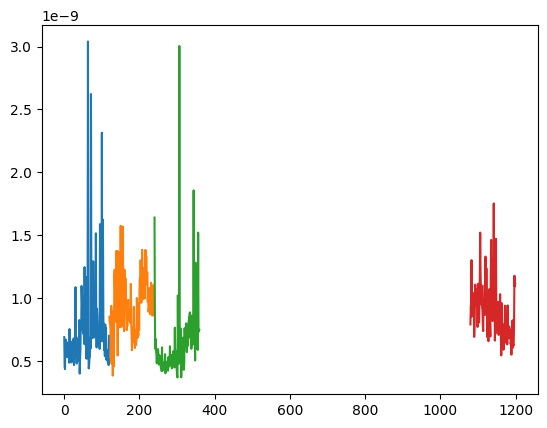

In [135]:
for id in [1,2,3,11]:
    plt.plot(a[a['ID']==id].index,a[a['ID']==id]['sumpower'])

In [93]:
bandPowerTable.sort_values(by=y=['ID', 'LEVEL']).reset_index(drop=True).plot()

<Axes: >

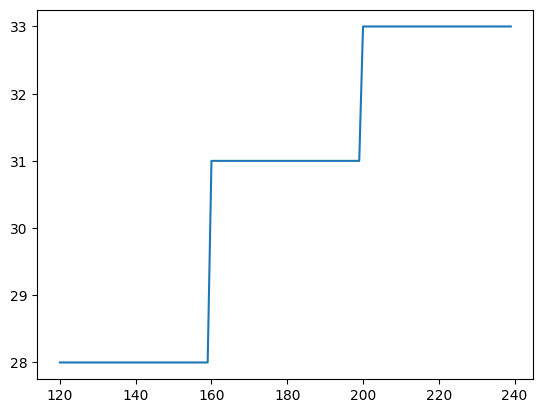

In [124]:
a[a['ID']==2].plot()

In [86]:
import pandas as pd
from datetime import datetime
import os 
import chardet
import pandas as pd
date_format = '%Y-%m-%d_%H.%M.%S.%f'
pvt_rt_path=r'D:\dataset\driver_dataset\DROZY\DROZY\pvt-rt'
listCSVFile=os.listdir(r'D:\dataset\driver_dataset\DROZY\DROZY\pvt-rt')
kss_file_path=datasetDict['kss_file']
print(listCSVFile[0])
df=pd.DataFrame(columns=["ID","LEVEL",'TIME'])
for  pvt_rt_file_index,filename in enumerate(listCSVFile):
    if pvt_rt_file_index==0:
         continue
    file_name=filename
    Id_level=file_name.split("-")
    ##ID
    
    Id=int(Id_level[0])
    ##LEVEL
    level=Id_level[1].split(".")[0]
    with open(os.path.join(pvt_rt_path,filename), 'rb') as f:
        result = chardet.detect(f.read())
    encoding = result['encoding']
    pvr_rt_file=pd.read_csv(os.path.join(pvt_rt_path,filename),encoding=encoding )
    zero_time=pvr_rt_file.columns.to_list()[0]
    # print(zero_time)
    
    
    try:
            KSS_table=pd.read_csv(kss_file_path,sep=" ",header=None)
            KSS=KSS_table.iloc[int(Id)-1][int(level)-1]
    except ValueError:
        continue
    zero_time_datetime_obj=datetime.strptime(zero_time, date_format)
    zero_timestamp=zero_time_datetime_obj.timestamp()
    df.loc[len(df)]={"ID":Id,"LEVEL":level,'KSS':KSS,'TIME':zero_timestamp}

df

# pvr_rt_file=pd.read_csv(os.path.join(r'D:\dataset\driver_dataset\DROZY\DROZY\pvt-rt',listCSVFile[1]),sep=" ",header=None)
# zero_time=pvr_rt_file.columns.to_list()[0]


._2-3.csv


,ID,LEVEL,TIME
0,1,1,1.416968e+09
1,1,2,1.417030e+09
2,1,3,1.417061e+09
3,10,1,1.422499e+09
4,10,3,1.422590e+09
5,11,1,1.423189e+09
6,11,2,1.423251e+09
7,11,3,1.423282e+09
8,12,1,1.423189e+09
9,13,1,1.423276e+09


<Axes: >

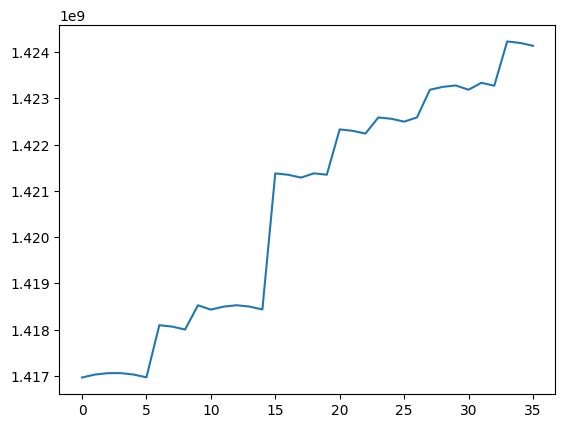

In [88]:
FFF=df.sort_values(by='ID').reset_index(drop=True)
FFF['TIME'].plot()

In [6]:
# bandPowerTable=getBandPowerTable(datasetDict['kss_file'],datasetDict['psg_folder'])
# uniform=getUniformBandPowerTable(bandPowerTable)

# Face

## EndToEnd

In [6]:
# initialFolder()
from project.dataprocess.FacePrrocess import *
from project.dataprocess.DatasetProcess import *
videoFolder=datasetDict['videos_folder']
levelFramesFoler=outputDict['level_frames_folder']
kssFramesFolder=outputDict['kss_frames_folder']
kss_file_path=datasetDict['kss_file']
# getLevelFramesFolder(videoFolder,levelFramesFoler)


In [ ]:
getLevelFramesFolder(videoFolder,levelFramesFoler)


In [9]:
getKSSFramesFolder(videoFolder,levelFramesFoler,kss_file_path)


KeyboardInterrupt: 

In [10]:
getKSSFacesFolder(videoFolder,r'D:\\project_meta\\NNproject\\NNI\\output\\video_frames\\face_kss_frames',kss_file_path)


Exception: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

Exception: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

Exception: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

Exception: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

Exception: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:787: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'

Exception: 'NoneType' object has no attribute 'shape'
Exception: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\ope

In [ ]:
getLevelFacesFolder(videoFolder,levelFramesFoler,kss_file_path)

In [46]:
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图片大小
    transforms.ToTensor(),  # 转换为张量
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 归一化
])
pdataset=ImageFolder(r"D:\project_meta\NNproject\NNI\output\video_frames\FaceKSSFolder",transform=transform)

In [47]:
from collections import Counter
# 假设您有一个名为 my_list 的列表
my_list = dataset.targets
# 使用 Counter 计算列表中各个元素的数量
element_counts = Counter(my_list)
# 打印结果
for element, count in element_counts.items():
    print(f"元素 {element} 的数量为 {count}")
len(dataset.targets)

元素 0 的数量为 595
元素 1 的数量为 1037
元素 2 的数量为 575
元素 3 的数量为 149
元素 4 的数量为 738
元素 5 的数量为 1034
元素 6 的数量为 725
元素 7 的数量为 295


5148

In [48]:
train,test=random_split(pdataset,[int(0.7*len(dataset)),len(dataset)-int(0.7*len(dataset))])

In [49]:
from torch.utils.data import Subset, DataLoader

# 把 train 数据集转换为 Subset 对象
subset_train = Subset(train, range(len(train)))

# 创建数据加载器，每个 batch_size 设置为 1 是为了统计每个类别元素的数量
loader_train = DataLoader(subset_train, batch_size=1, shuffle=False)

# 初始化类别数量字典
class_count = {}

# 遍历数据加载器统计数量
for _, label in loader_train:
    label = label.item()
    if label in class_count:
        class_count[label] += 1
    else:
        class_count[label] = 1

# 打印每个类别元素的数量
for label, count in class_count.items():
    print(f"类别 {label}: {count} 个")

类别 2: 382 个
类别 7: 206 个
类别 6: 494 个
类别 1: 723 个
类别 5: 728 个
类别 4: 531 个
类别 0: 430 个
类别 3: 109 个


In [51]:
from torch.utils.data import Subset, DataLoader

# 把 train 数据集转换为 Subset 对象
subset_test = Subset(test, range(len(test)))

# 创建数据加载器，每个 batch_size 设置为 1 是为了统计每个类别元素的数量
loader_test = DataLoader(subset_test, batch_size=1, shuffle=False)

# 初始化类别数量字典
class_count = {}

# 遍历数据加载器统计数量
for _, label in loader_test:
    label = label.item()
    if label in class_count:
        class_count[label] += 1
    else:
        class_count[label] = 1

# 打印每个类别元素的数量
for label, count in class_count.items():
    print(f"类别 {label}: {count} 个")

类别 5: 306 个
类别 6: 231 个
类别 4: 207 个
类别 3: 40 个
类别 1: 314 个
类别 0: 165 个
类别 2: 193 个
类别 7: 89 个


In [44]:
train.__dict__.keys()

dict_keys(['dataset', 'indices'])

In [37]:
len(train),len(test)

(3603, 1545)

In [41]:
train.dataset.targets
from collections import Counter

# 假设您有一个名为 my_list 的列表
my_list = train.dataset.targets

# 使用 Counter 计算列表中各个元素的数量
element_counts = Counter(my_list)

# 打印结果
for element, count in element_counts.items():
    print(f"元素 {element} 的数量为 {count}")
len(train.dataset.targets)

元素 0 的数量为 595
元素 1 的数量为 1037
元素 2 的数量为 575
元素 3 的数量为 149
元素 4 的数量为 738
元素 5 的数量为 1034
元素 6 的数量为 725
元素 7 的数量为 295


5148

## Feature

# ECG

## EndToEnd

In [19]:
from project.dataset.BaseDataset import *
import pandas as pd
controlWindows=pd.read_csv(r"D:\project_meta\NNproject\NNI\output\windowsTable.csv")
signalwavedataset=TableControlECGDataset(controlWindows,psgFileFolderPath=datasetDict['psg_folder'],Mintime=50)

In [20]:
signalwavedataset[0]['data'].shape


(1, 25600)

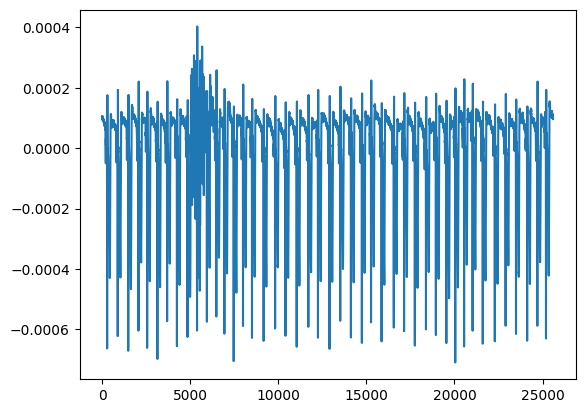

In [21]:
import matplotlib.pyplot as plt
plt.plot(signalwavedataset[0]['data'].T)

## Feature

In [32]:
signalwavedataset=TableControlECGDataset(controlWindows,psgFileFolderPath=datasetDict['psg_folder'],Mintime=15)
from project.dataprocess.SignalProcess import *
import sys
import time
import logging
import numpy as np
from biosppy.signals import ecg
from biosppy.storage import load_txt
import matplotlib.pyplot as plt


Setting up low-pass filter at 0.01 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 0.01 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.01 Hz)
- Filter length: 845 samples (1.650 s)



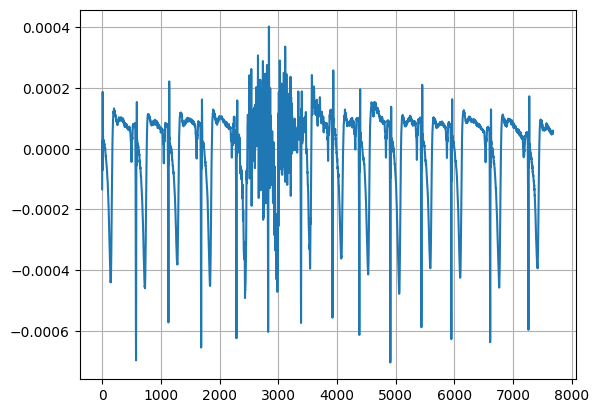

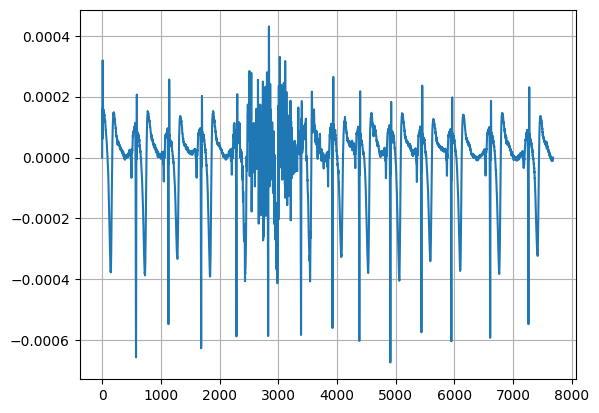

In [55]:
signal=signalwavedataset[0]['data'][0].T
zaoyin=mne.filter.filter_data(signal,512,l_freq=0,h_freq=0.01)
EEGData=signal-zaoyin
plt.figure()
plt.grid(True)
plt.plot(signal)
plt.show()
plt.figure()
plt.grid(True)
plt.plot(EEGData)
plt.show()

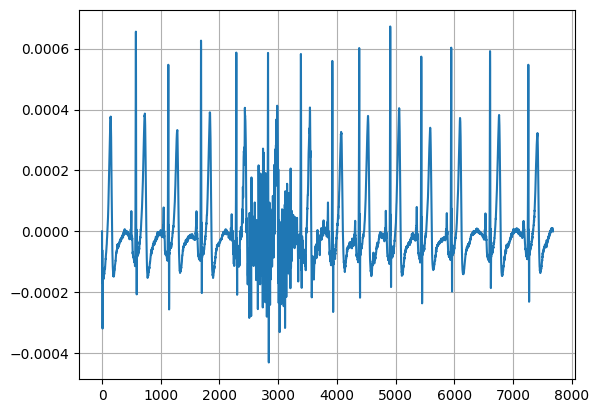

In [56]:
sfreq=512
rpeaks0=ecg.christov_segmenter(EEGData,sfreq)
rpeaks1=ecg.christov_segmenter(-1*EEGData,sfreq)
if sum(EEGData[rpeaks0[0]])<sum(-1*EEGData[rpeaks1[0]]):
    EEGData=-1*EEGData
plt.figure()
plt.grid(True)
plt.plot(EEGData)
plt.show()

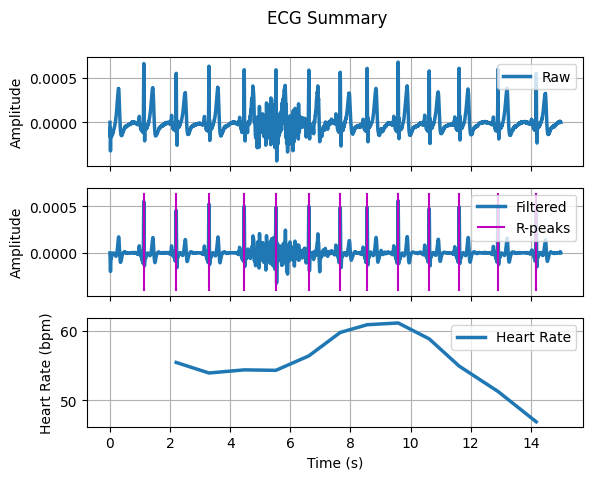

In [57]:
result=ecg.ecg(EEGData,sfreq)
result_dict=result.as_dict()

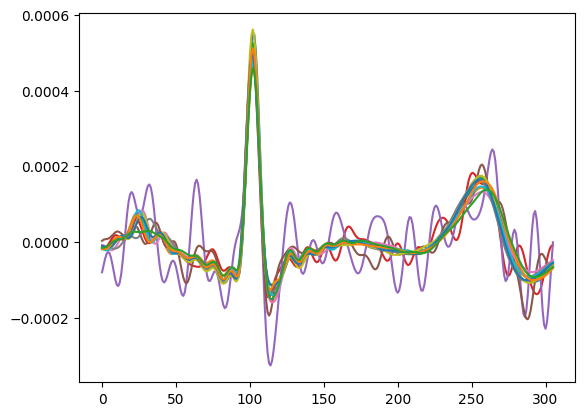

In [59]:
plt.plot(result_dict['templates'].T)

In [ ]:
class EEGEndToEndDataset(TableControlECGDataset):
    def __getitem__(self, index):
        Datadict = super().__getitem__(index)
        signalwave=Datadict['data']
        rpeaks0=ecg.christov_segmenter(signalwave,sfreq)
        rpeaks1=ecg.christov_segmenter(-1*signalwave,sfreq)
        if sum(signalwave[rpeaks0[0]])<sum(-1*signalwave[rpeaks1[0]]):
            signalwave=-1*signalwave
        result=ecg.ecg(signalwave,sfreq)
        result_dict=result.as_dict()
        return result_dict['filtered'],Datadict['LEVEL']


In [60]:
from torchvision.datasets import ImageFolder
ImageFolder(r'')